In [19]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

# Import the kmeans algorithm
from sklearn.cluster import KMeans

from functions import *

In [20]:
df = pd.read_csv("data.csv")

In [21]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'diff_app_pur', 'diff_car_app', 'diff_del_car', 'diff_est_act',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category_name_en',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'review_id',
       'review_score', 'review_creation_date', 'review_answer_timestamp',
       'diff_rec_rev'],
      

In [22]:
df["item_dimension"] = df['product_height_cm']*df['product_width_cm']*df['product_length_cm']

In [23]:
cols_to_keep = ['customer_city', 'customer_state', 'diff_app_pur', 'diff_car_app', 'diff_del_car', 'diff_est_act',
                'price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 
                'product_category_name_en',"item_dimension", 'product_weight_g', 'seller_city', 'seller_state', 'review_score',
                'diff_rec_rev']

df = df[cols_to_keep]

In [24]:
df.shape

(94471, 19)

In [25]:
df.dtypes.value_counts()

float64    9
object     6
int64      4
dtype: int64

In [26]:
df["product_category_name_en"].unique()

array(['office_furniture', 'furniture_decor', 'auto', 'sports_leisure',
       'furniture_living_room', 'baby', 'housewares',
       'kitchen_dining_laundry_garden_furniture', 'home_confort',
       'bed_bath_table', 'toys', 'home_comfort_2', 'cool_stuff',
       'computers_accessories', 'musical_instruments', 'consoles_games',
       'watches_gifts', 'perfumery', 'home_construction', 'garden_tools',
       'health_beauty', 'small_appliances', 'stationery',
       'air_conditioning', 'telephony', 'construction_tools_construction',
       'electronics', 'pet_shop', 'fixed_telephony', 'food_drink',
       'drinks', 'food', 'market_place', 'signaling_and_security',
       'diapers_and_hygiene', 'audio', 'fashion_bags_accessories',
       'construction_tools_safety', 'fashio_female_clothing',
       'luggage_accessories', 'fashion_shoes', 'art',
       'books_general_interest', 'fashion_male_clothing', 'music',
       'dvds_blu_ray', 'construction_tools_lights', 'christmas_supplies',
     

In [13]:
categories =    {"FURNITURE":['office_furniture', 'furniture_decor', 'furniture_living_room','kitchen_dining_laundry_garden_furniture' 'furniture_mattress_and_upholstery', 'furniture_bedroom'],
                "LEISURE":['auto', 'sports_leisure', 'consoles_games','musical_instruments', 'arts_and_craftmanship' 'toys',  'cool_stuff',  'watches_gifts', 'pet_shop'],
                "MULTIMEDIA":['music', 'dvds_blu_ray', 'cine_photo', 'cds_dvds_musicals', 'fixed_telephony', 'electronics', 'audio', 'tablets_printing_image', 
                'computers', 'computers_accessories','telephony'],
                "HOME_IMPROVEMENT":['garden_tools', 'costruction_tools_garden', 'construction_tools_construction', 'home_construction', 'construction_tools_lights','construction_tools_safety', 'costruction_tools_tools', 'air_conditioning', 'signaling_and_security'],
                "BOOKS_STATIONERY":['books_imported', 'books_general_interest', 'books_technical', 'stationery'],
                "FASHION_ACCESSORIES":['fashion_bags_accessories','fashion_childrens_clothes''fashion_sport','fashion_underwear_beach', 'fashion_male_clothing',  'fashio_female_clothing','fashion_shoes', 'luggage_accessories'],
                "HOUSEWARE":['bed_bath_table', 'housewares', 'home_confort',  'home_comfort_2', 'home_appliances','home_appliances_2', 'la_cuisine' 'small_appliances_home_oven_and_coffee', 'small_appliances'],
                "HEALTH_BEAUTY":['perfumery','health_beauty',  'baby', 'diapers_and_hygiene'],
                "DECOR":['flowers', 'art', 'party_supplies','christmas_supplies'],
                "FOOD":['food_drink', 'drinks', 'food'],
                "OTHER":['agro_industry_and_commerce', 'security_and_services', 'industry_commerce_and_business', 'market_place']}

In [29]:
df["category"] = df["product_category_name_en"].map(categories)

In [13]:
df

,diff_app_pur,diff_car_app,diff_del_car,diff_est_act,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_en,item_dimension,product_weight_g,review_score,diff_rec_rev,category
0,997.0,6.0,1.0,10.0,124.99,21.88,1,credit_card,2,146.87,office_furniture,107136.0,8683.0,4,-1,NaN
1,86255.0,12.0,5.0,20.0,112.99,24.90,1,credit_card,1,275.79,office_furniture,107136.0,8683.0,1,-1,NaN
2,7890.0,10.0,6.0,16.0,124.99,15.62,1,credit_card,7,140.61,office_furniture,107136.0,8683.0,3,-1,NaN
3,9819.0,14.0,9.0,21.0,106.99,30.59,1,credit_card,10,137.58,office_furniture,107136.0,8683.0,4,-1,NaN
4,894.0,5.0,13.0,12.0,126.99,15.06,1,credit_card,5,142.05,office_furniture,107136.0,8683.0,4,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94466,437.0,2.0,8.0,26.0,1750.00,39.02,1,credit_card,10,1789.02,health_beauty,3000.0,1100.0,4,-1,NaN
94467,19362.0,2.0,4.0,17.0,145.90,15.47,1,boleto,1,161.37,drinks,7168.0,2250.0,5,-1,NaN
94468,85886.0,0.0,10.0,13.0,49.90,22.28,1,credit_card,3,72.18,pet_shop,8960.0,200.0,5,-1,NaN
94469,615.0,1.0,8.0,12.0,135.98,88.46,1,credit_card,6,224.44,garden_tools,41976.0,3211.0,5,-1,NaN


In [27]:
furniture = ['office_furniture', 'furniture_decor', 'furniture_living_room','kitchen_dining_laundry_garden_furniture' 'furniture_mattress_and_upholstery', 'furniture_bedroom']
leisure = ['auto', 'sports_leisure', 'consoles_games','musical_instruments', 'arts_and_craftmanship' 'toys',  'cool_stuff',  'watches_gifts', 'pet_shop']
multimedia = ['music', 'dvds_blu_ray', 'cine_photo', 'cds_dvds_musicals', 'fixed_telephony', 'electronics', 'audio', 'tablets_printing_image', 
                'computers', 'computers_accessories','telephony']
home_improvement = ['garden_tools', 'costruction_tools_garden', 'construction_tools_construction', 'home_construction', 'construction_tools_lights','construction_tools_safety', 'costruction_tools_tools', 'air_conditioning', 'signaling_and_security']
books_stationery = ['books_imported', 'books_general_interest', 'books_technical', 'stationery']
fashion_accessories = ['fashion_bags_accessories','fashion_childrens_clothes''fashion_sport','fashion_underwear_beach', 'fashion_male_clothing',  'fashio_female_clothing','fashion_shoes', 'luggage_accessories']
houseware = ['bed_bath_table', 'housewares', 'home_confort',  'home_comfort_2', 'home_appliances','home_appliances_2', 'la_cuisine' 'small_appliances_home_oven_and_coffee', 'small_appliances']
health_beauty = ['perfumery','health_beauty',  'baby', 'diapers_and_hygiene']
decor = ['flowers', 'art', 'party_supplies','christmas_supplies']
food = ['food_drink', 'drinks', 'food']
other = ['agro_industry_and_commerce', 'security_and_services', 'industry_commerce_and_business', 'market_place']

In [30]:
for i in range (0,df.shape[0]):
    old_cat = df["product_category_name_en"][i]
    if old_cat in furniture:
        df["category"][i] = "furniture"
    elif old_cat in leisure:
        df["category"][i] = "leisure"
    elif old_cat in multimedia:
        df["category"][i] = "multimedia"
    elif old_cat in home_improvement:
        df["category"][i] = "home_improvement"
    elif old_cat in books_stationery:
        df["category"][i] = "books_stationery"
    elif old_cat in fashion_accessories:
        df["category"][i] = "fashion_accessories"
    elif old_cat in houseware:
        df["category"][i] = "houseware"
    elif old_cat in health_beauty:
        df["category"][i] = "health_beauty"
    elif old_cat in decor:
        df["category"][i] = "decor"
    elif old_cat in food:
        df["category"][i] = "food"
    else: df["category"][i] = "other"

In [31]:
df["category"].unique()

array(['furniture', 'leisure', 'health_beauty', 'houseware', 'other',
       'multimedia', 'home_improvement', 'books_stationery', 'food',
       'fashion_accessories', 'decor'], dtype=object)

In [32]:
df = df.drop(columns=["product_category_name_en"])

In [33]:
df.select_dtypes(include='object').nunique()

customer_city     4071
customer_state      27
payment_type         4
seller_city        587
seller_state        22
category            11
dtype: int64

In [34]:
# create a separate dataframe with categorical columns to use later with kprototype

df_cats = df

# drop categorical columns with too many unique values will create too many cols with one hot encoder

df = df.drop(columns=["customer_city", "customer_state", "seller_city", "seller_state"])

In [35]:
df.dtypes.value_counts()

float64    9
int64      4
object     2
dtype: int64

### One Hot Encoder

In [36]:
shape_before = df.shape
df = pd.get_dummies(df)
print("We have created " + str(df.shape[1]-shape_before[1]) + " new features to replace our categorical features.")

We have created 13 new features to replace our categorical features.


In [37]:
df.dtypes.value_counts()

uint8      15
float64     9
int64       4
dtype: int64

### Normalization

The plan is to test StandardScaler on our float features and MinMaxScaler on our integer features. Then we will compare the results of StandardScaler to those with RobustScaler and QuantileTransformer.

In [39]:
continuous_features = list(df.select_dtypes(include='float64'))
integer_features = list(df.select_dtypes(exclude='float64'))

ct_ss = ColumnTransformer(
        transformers=[
            ("cont_feats", StandardScaler(), continuous_features),
            ("int_feats", MinMaxScaler(), integer_features)
        ]
)

ct_rs = ColumnTransformer(
        transformers=[
            ("cont_feats", RobustScaler(), continuous_features),
            ("int_feats", MinMaxScaler(), integer_features)
        ]
)

ct_qt = ColumnTransformer(
        transformers=[
            ("cont_feats", QuantileTransformer(), continuous_features),
            ("int_feats", MinMaxScaler(), integer_features)
        ]
)

df_scaled_ss = ct_ss.fit_transform(df)
df_scaled_rs = ct_rs.fit_transform(df)
df_scaled_qt = ct_qt.fit_transform(df)

In [40]:
df_scaled_ss = pd.DataFrame(df_scaled_ss, index=df.index, columns=df.columns)

### Principal Component Analysis

In [41]:
# Select the number of principal components we will return
num_components = 28

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(df_scaled_ss)

PCA(n_components=28)

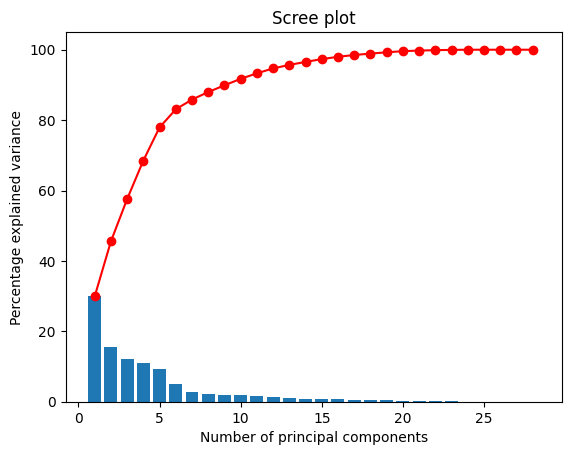

In [42]:
display_scree_plot(pca) 

We will retain 5 or 6 components.

In [43]:
pca = PCA(n_components=6)
pca.fit(df_scaled_ss)

PCA(n_components=6)

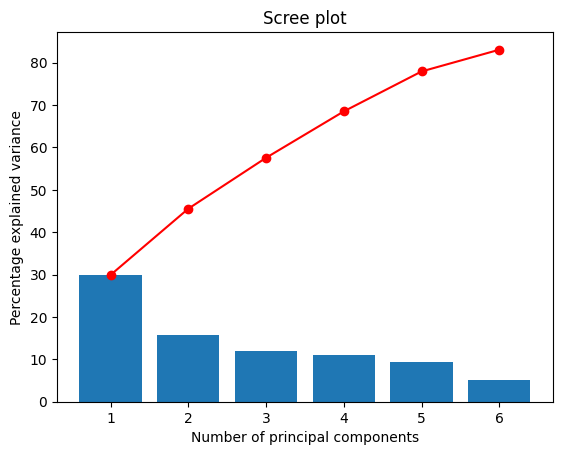

In [44]:
display_scree_plot(pca) 

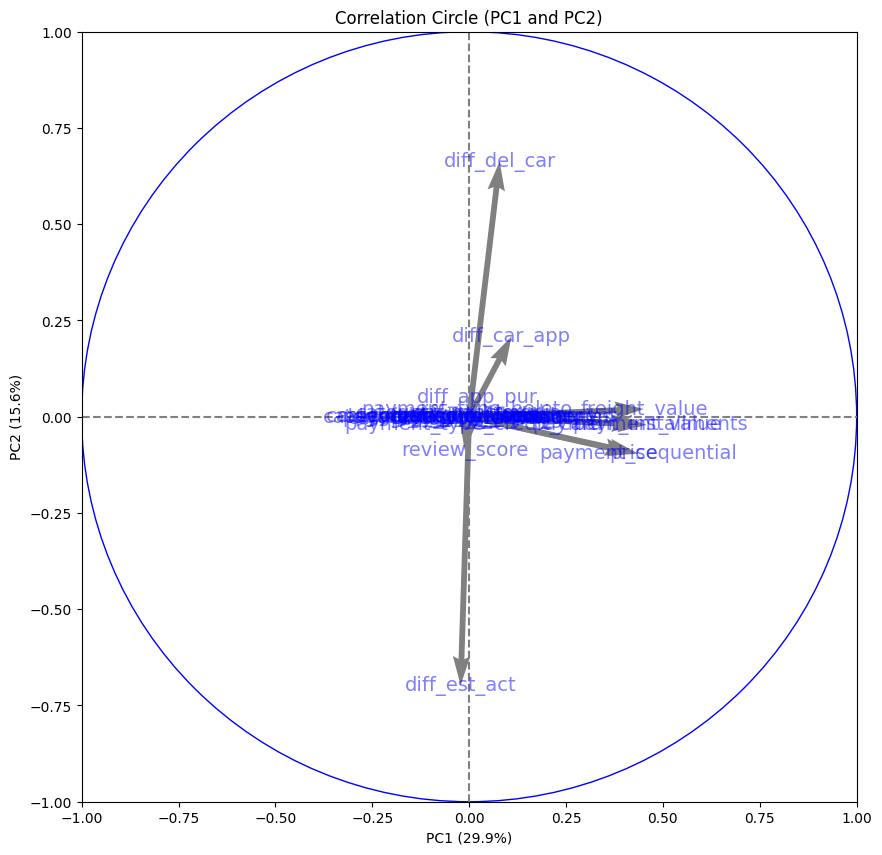

In [45]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, 6, pca, [(0,1)], labels = df.columns)

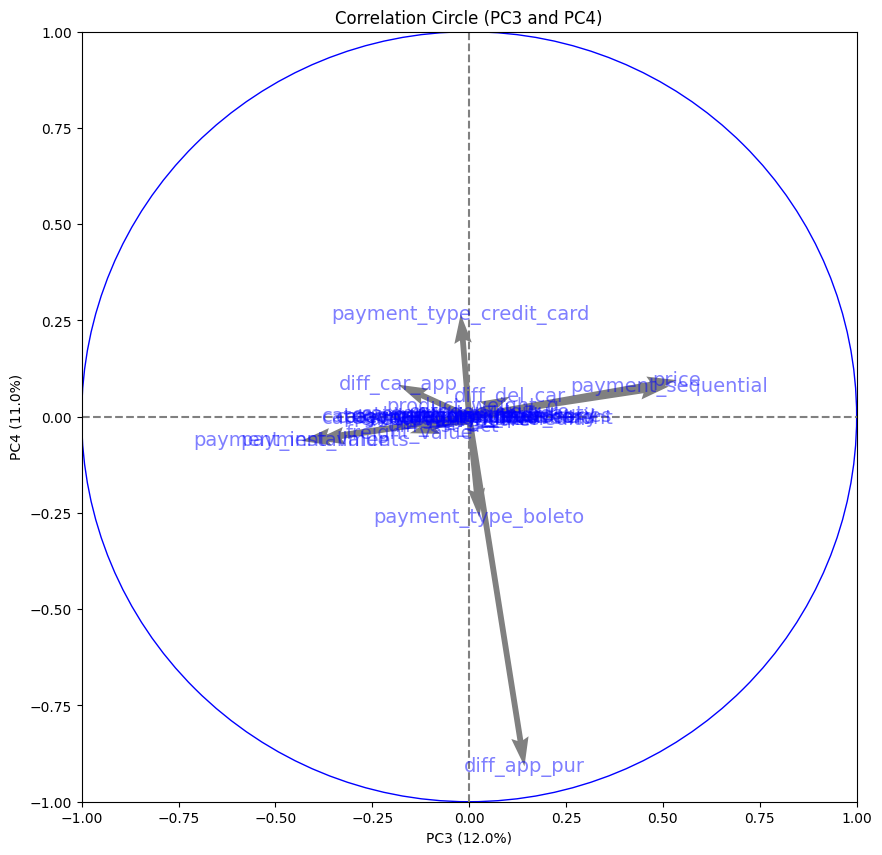

In [34]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, 6, pca, [(2,3)], labels = df.columns)

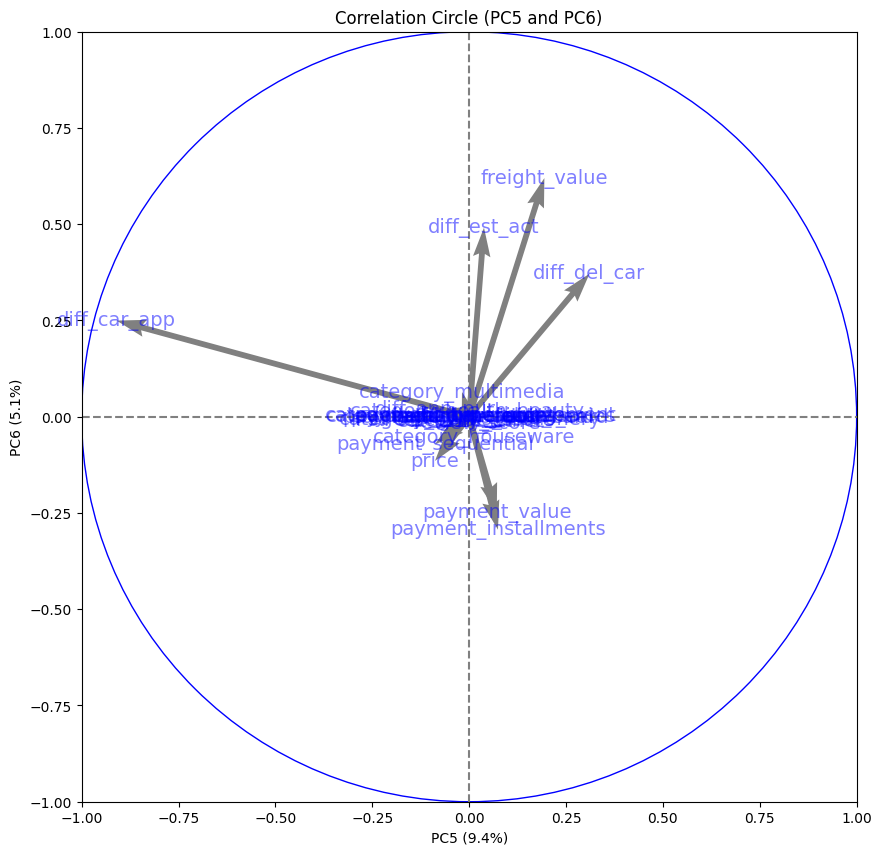

In [35]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, 6, pca, [(4,5)], labels = df.columns)

## K-means

The Calinski-Harabasz index (CH) is one of the clustering algorithms evaluation measures. It is most commonly used to evaluate the goodness of split by a K-Means clustering algorithm for a given number of clusters.

A high CH means better clustering since observations in each cluster are closer together (more dense), while clusters themselves are further away from each other (well separated).

#### How many clusters

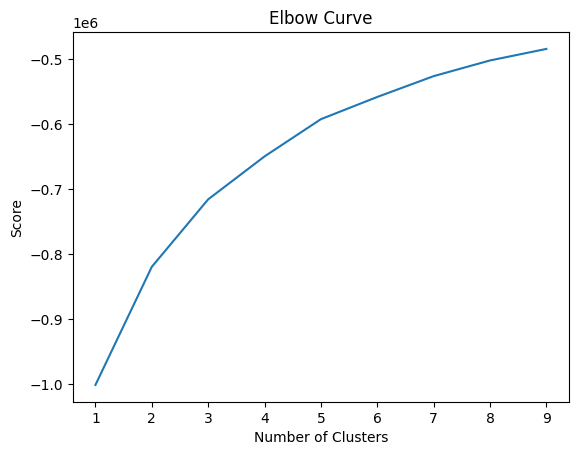

In [38]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 10
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(df_scaled_ss).score(df_scaled_ss) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [59]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=6, n_init=10)

# Fit the data to the model
kmeans.fit(df_scaled_ss)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(df_scaled_ss)

In [60]:
# Add cluster number to the original data
df_scaled_clustered = pd.DataFrame(df_scaled_ss, columns=df.columns, index=df.index)
df_scaled_clustered['cluster'] = clusters

df_scaled_clustered.head()

,diff_app_pur,diff_car_app,diff_del_car,diff_est_act,price,freight_value,payment_sequential,payment_installments,payment_value,item_dimension,...,category_fashion_accessories,category_food,category_furniture,category_health_beauty,category_home_improvement,category_houseware,category_leisure,category_multimedia,category_other,cluster
0,-0.557411,1.060367,-0.905273,-0.091128,-0.000549,0.108594,-0.047813,3.958683,1.753726,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,3.051570,2.772297,-0.443783,0.897768,-0.064321,0.299607,0.551679,3.958683,1.753726,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,-0.265629,2.201654,-0.328411,0.502209,-0.000549,-0.287349,-0.076922,3.958683,1.753726,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,-0.183975,3.342941,0.017706,0.996657,-0.096207,0.659497,-0.091012,3.958683,1.753726,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,-0.561771,0.775045,0.479195,0.106651,0.010080,-0.322768,-0.070226,3.958683,1.753726,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [61]:
pca = PCA(n_components=6)
pca.fit(df_scaled_ss)
df_reduced = pca.transform(df_scaled_ss)

In [63]:
df_reduced = pd.DataFrame(df_reduced, index=df.index, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_reduced['cluster'] = clusters
df_reduced.head()

,PC1,PC2,PC3,PC4,PC5,PC6,cluster
0,2.806307,-0.514049,-2.111910,-2.030308,-0.783587,-1.655784,3
1,3.315836,-0.224361,0.486752,-3.577250,-2.391919,-0.465827,3
2,2.779557,-0.272549,-2.059766,-2.196659,-1.719739,-1.102115,3
3,3.296049,-0.134866,-2.231153,-2.551736,-2.442836,0.152028,3
4,2.681022,0.195333,-2.064464,-1.772374,-0.169341,-1.382297,3


In [65]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

In [66]:
centres_reduced

array([[ 6.89199106, -1.06433688,  2.74282074,  4.26743161, -0.66098339,
        -0.47592844],
       [-0.38599713, -0.35366668, -0.4706898 ,  0.29769732,  0.07520116,
        -0.01464129],
       [ 0.57820835,  1.15724765, -0.6841803 , -0.38531236, -3.49193575,
         0.51263976],
       [ 4.69288457, -0.18032763, -1.06986244, -1.72120888,  0.39272584,
        -0.19070243],
       [ 0.13332354,  2.98140254, -0.20871106,  0.59549497,  0.70095662,
         0.17819918],
       [-0.53830586,  0.06251708,  1.73905574, -0.95866909, -0.01931321,
        -0.00856555]])

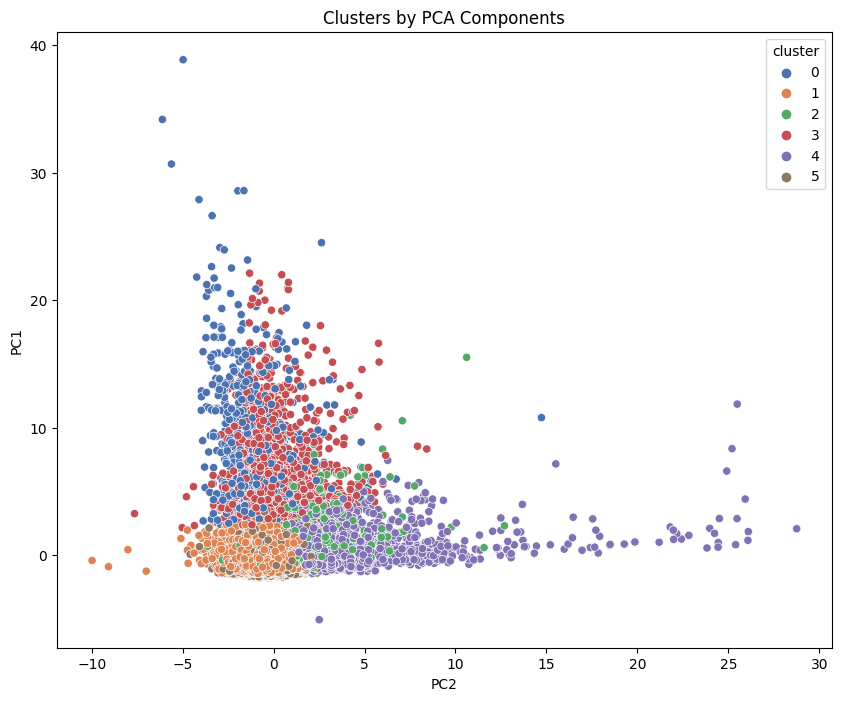

In [71]:
x_axis = df_reduced["PC2"]
y_axis = df_reduced["PC1"]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_reduced["cluster"], palette="deep")
plt.title("Clusters by PCA Components")
plt.show()

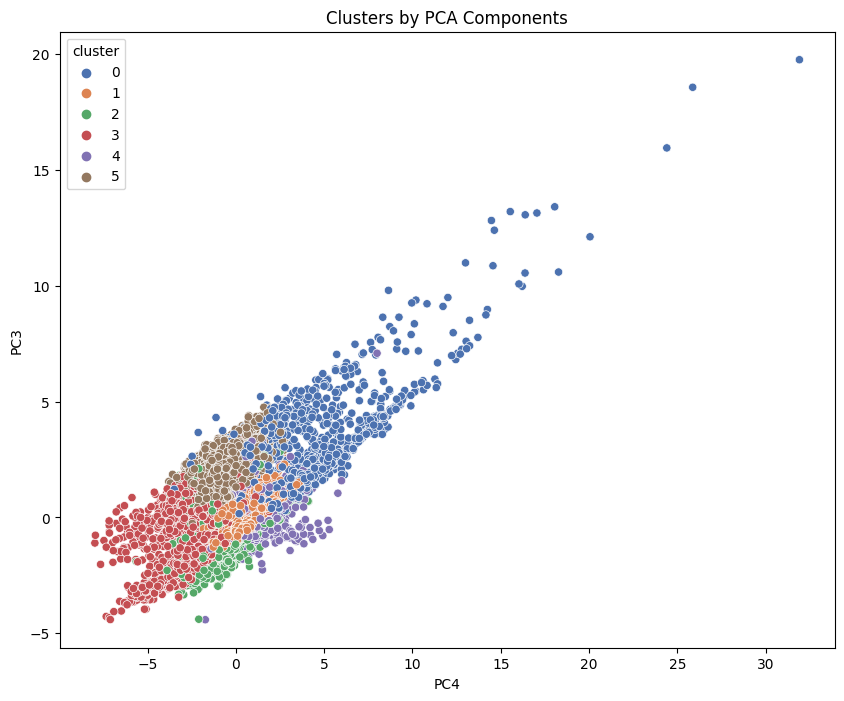

In [72]:
x_axis = df_reduced["PC4"]
y_axis = df_reduced["PC3"]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_reduced["cluster"], palette="deep")
plt.title("Clusters by PCA Components")
plt.show()

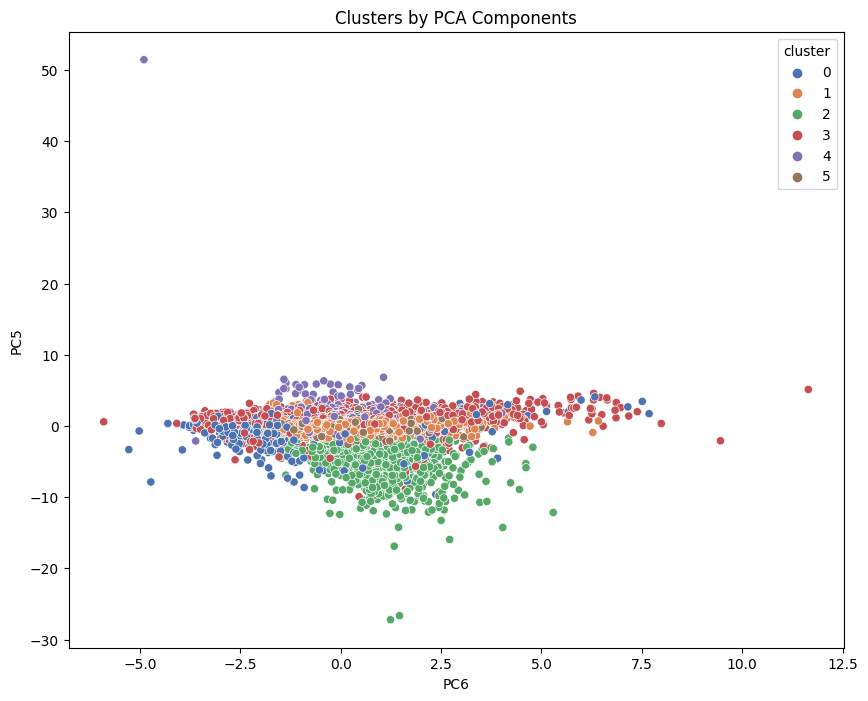

In [73]:
x_axis = df_reduced["PC6"]
y_axis = df_reduced["PC5"]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_reduced["cluster"], palette="deep")
plt.title("Clusters by PCA Components")
plt.show()

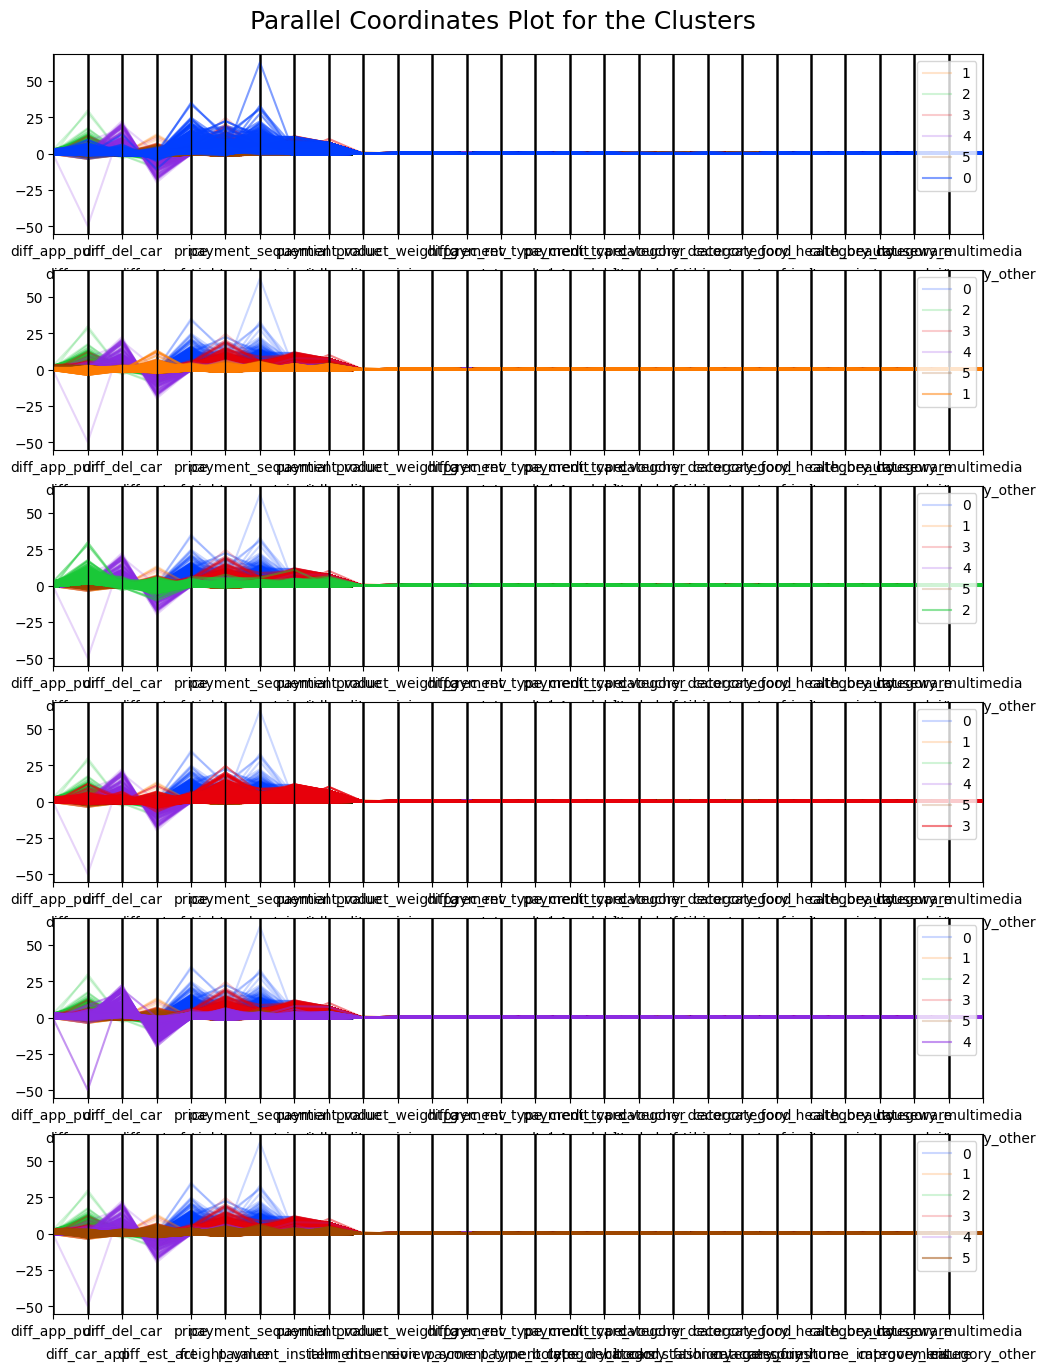

In [74]:
# Add the cluster number to the original scaled data
df_clustered = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)
df_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(df_clustered, 6)

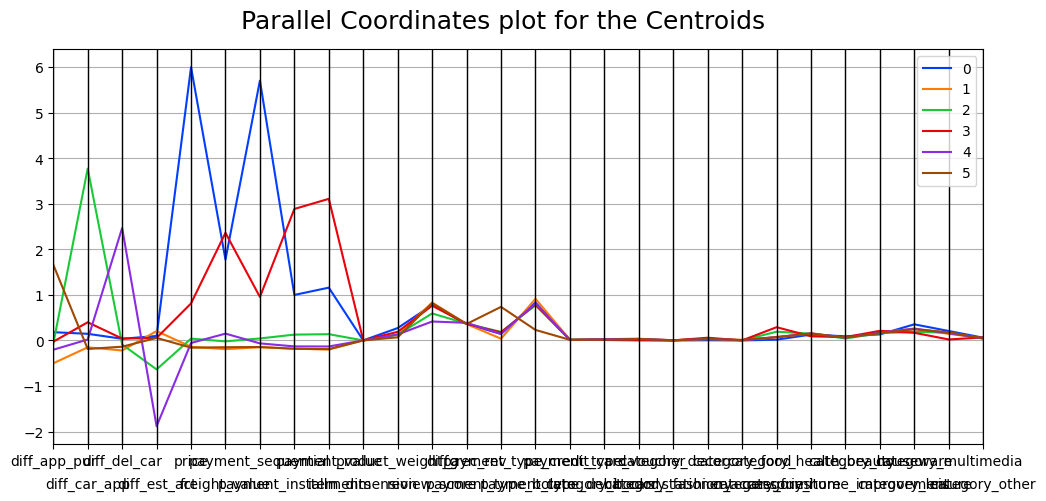

In [85]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

## K-prototype

In [87]:
from sklearn.preprocessing import PowerTransformer

In [107]:
kprot_data = pd.read_csv("data.csv")

In [108]:
kprot_data = kprot_data.drop(columns=['Unnamed: 0', 'customer_id', 'customer_unique_id', 
                'order_id', 'order_status', 'product_id', 'seller_id',
                'product_name_length', 'product_description_length',
                 'review_id', 'order_item_id'])

In [110]:
# #Pre-processing
# for c in kprot_data.select_dtypes(exclude='object').columns:
#     pt = PowerTransformer()
#     kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

# categorical_columns = [1, 2, 3, 4, 5, 6, 7, 12, 16, 19, 25, 27, 28, 30, 31]

# #Actual clustering
# kproto = KPrototypes(n_clusters= 6, init='Cao', n_jobs = 4)
# clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

# #Prints the count of each cluster group
# pd.Series(clusters).value_counts()

: 

: 

## RFM

#### Recency

#### Frequency

#### Monetary

In [39]:

# KPrototype for mixed data
# DBSCAN

In [40]:
# radar plot